## K-means clustering

K-means clustering is an unsupervised learning algorithm that classifies a data point based on the majority of its neighbors.

The algorithm is as follows:

- Choose the number of $k$ and a distance metric.
- Find the $k$ nearest neighbors of the sample that we want to classify.
- Assign the class label by majority vote.
- Update the centroids of each class.
- Repeat the steps above until convergence.

Note that because this algorithm takes distance into account, it is important that the features (columns) are on the same scale. For the iris dataset, they are but for other datasets, you may need to scale the features.

In [1]:
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = sklearn.datasets.load_iris(as_frame=True)
df = dataset.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'sepal length (cm)': [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
Unique values in 'sepal width (cm)': [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
Unique values in 'petal length (cm)': [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
Unique values in 'petal width (cm)': [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Unique values in 'target': [0 1 2]


In [12]:
X = (dataset['data']
    .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)

y = dataset['target']

Text(0.5, 1.0, 'Original Data')

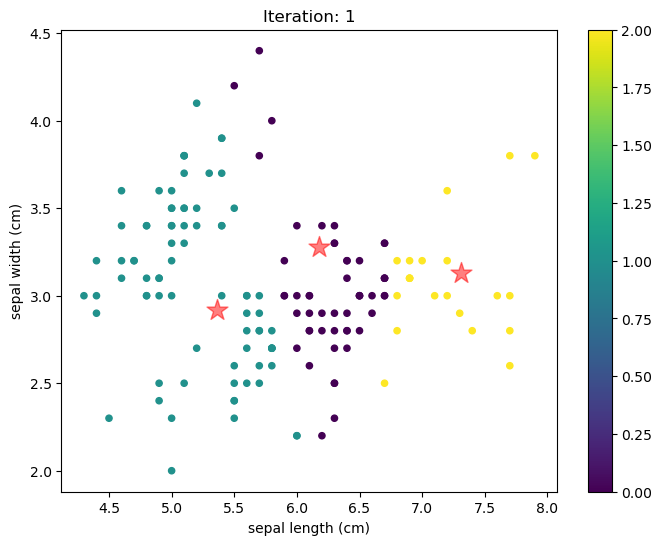

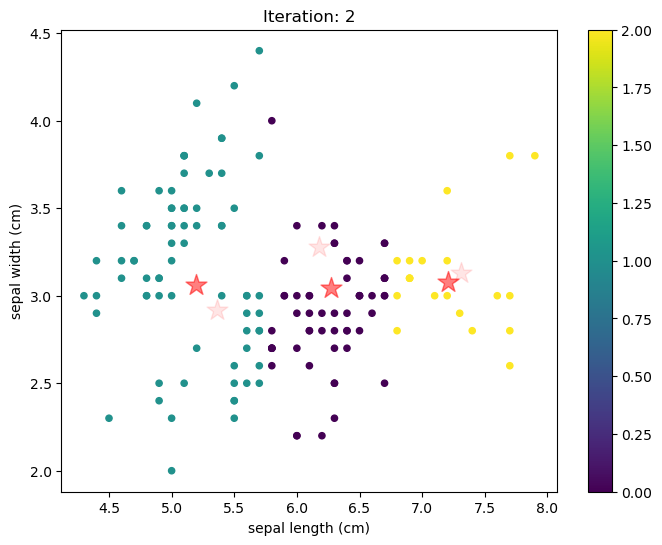

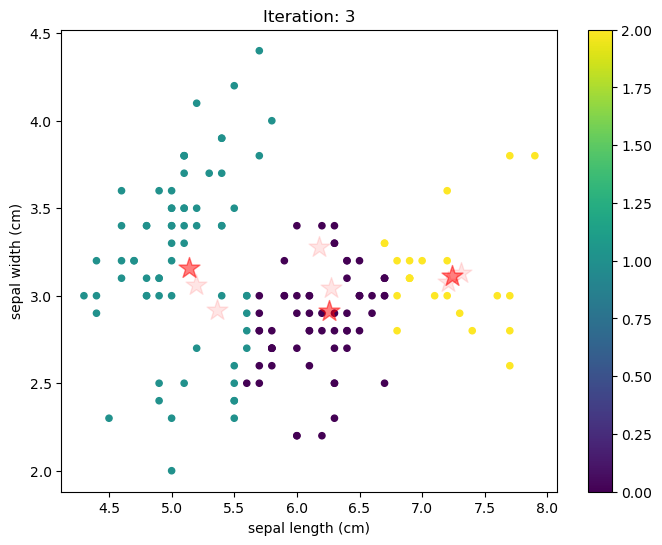

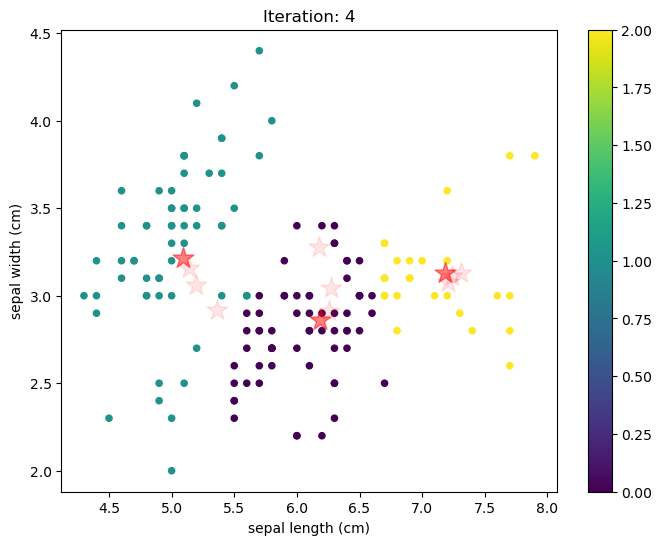

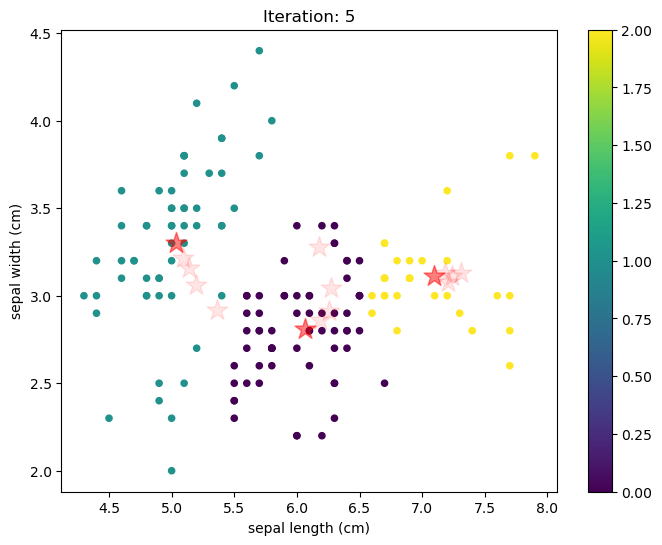

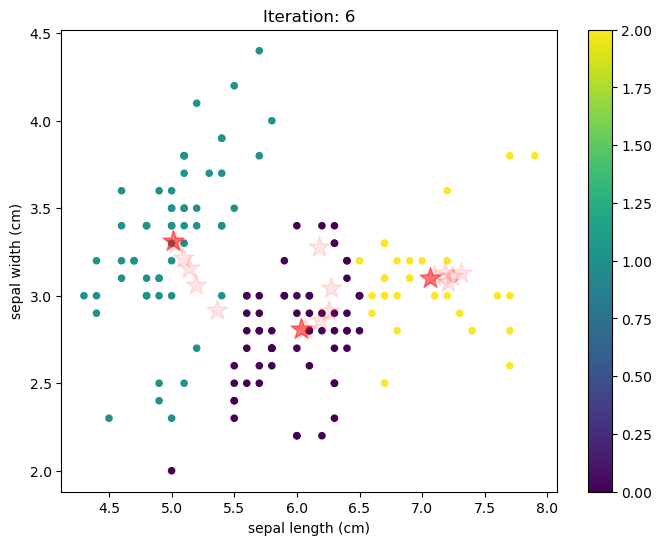

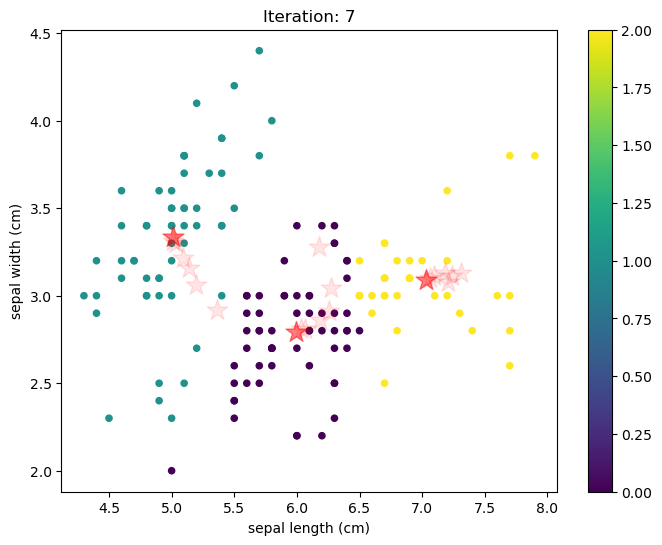

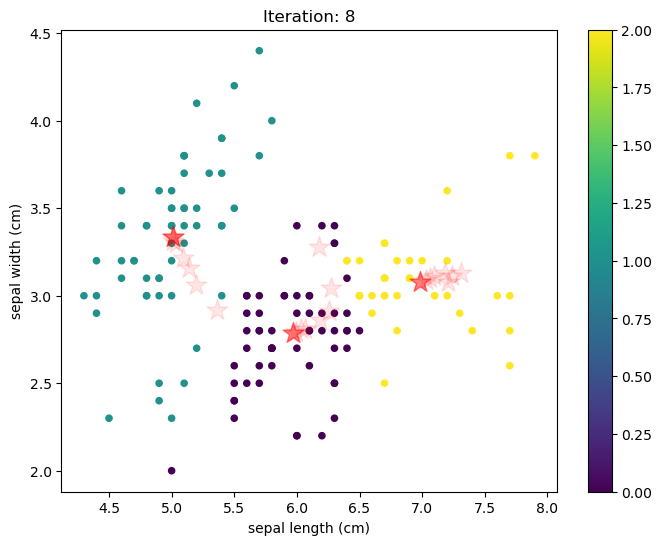

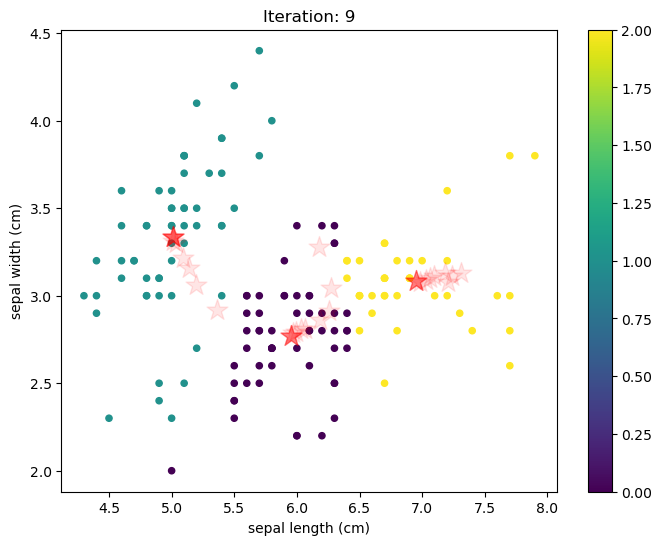

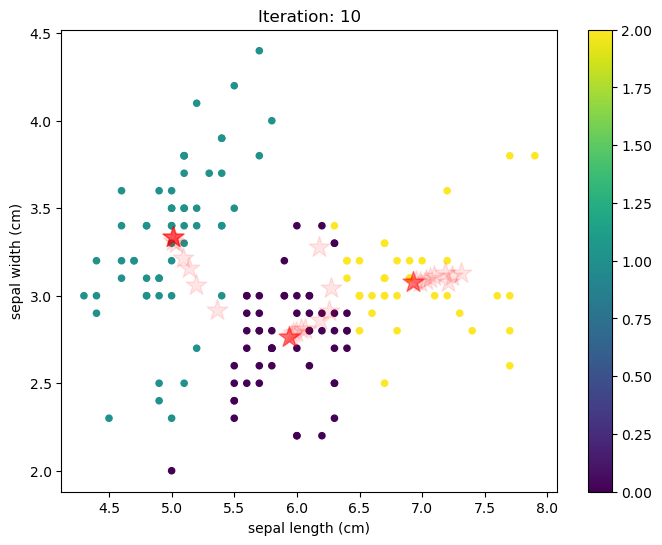

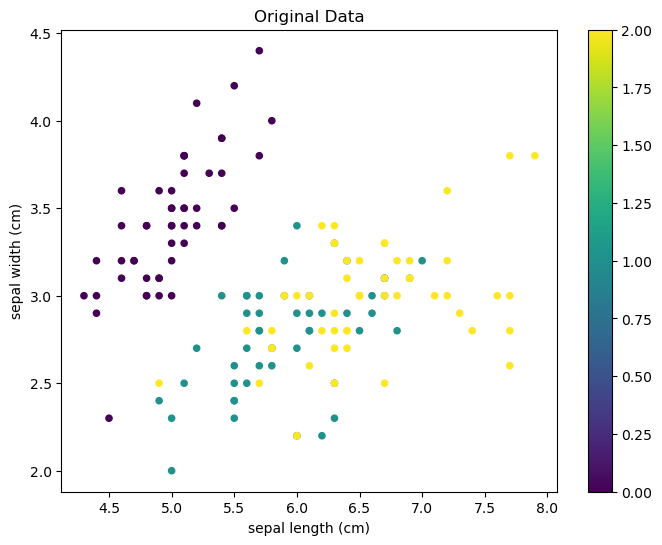

In [18]:
# demonstration of k-means clustering with iris dataset
# keep list of all centroids
centroids = []

# loop over a few iterations and plot the results
for i in range(10):
    model = KMeans(n_clusters=3, init='random', n_init=1,
                    max_iter=i+1, random_state=42)
    model.fit(X)
    label = model.predict(X)
    # plot the input data color by cluster
    fig, ax = plt.subplots(figsize=(8, 6))
    X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=label, cmap='viridis', ax=ax)
    # plot the centers
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=250, color='r', alpha=.5)
    ax.set_title('Iteration: ' + str(i))
    # plot previous centroids with reduced alpha value
    if i > 0:
        for centroid in centroids:
            ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=250, color='r', alpha=.1)
    # save the current centroids
    centroids.append(model.cluster_centers_)


  # plot the original data color by target
fig, ax = plt.subplots(figsize=(8, 6))
X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=y, cmap='viridis', ax=ax)
ax.set_title('Original Data')